**Big - Mart Sale prediction**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('Train.csv')
# df.head()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.shape

(8523, 12)

In [ ]:
# statistical info
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# datatype of attributes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Preprocessing the dataset


In [ ]:
# check for null values
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [ ]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [ ]:
miss_bool = df['Item_Weight'].isnull()
miss_bool


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [ ]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])
            # df['Item_Weight'][i]=0


In [ ]:
df['Item_Weight'].isnull().sum()


0

In [ ]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
df['Outlet_Size'].isnull().sum()


0

In [ ]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()



Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.930,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,Food
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food


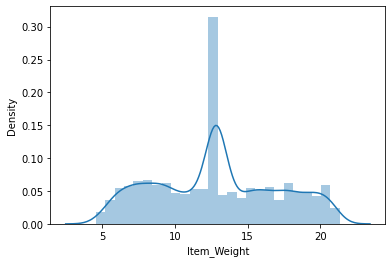

In [ ]:
sns.distplot(df['Item_Weight'])


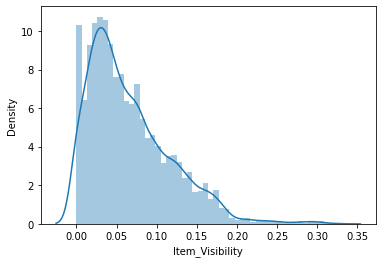

In [ ]:
sns.distplot(df['Item_Visibility'])


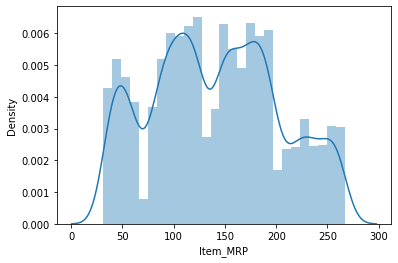

In [ ]:

sns.distplot(df['Item_MRP'])



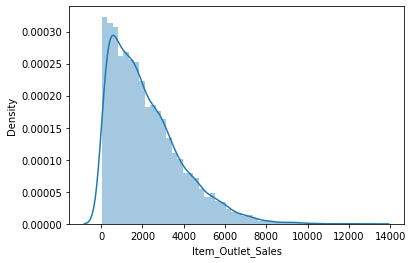

In [ ]:
sns.distplot(df['Item_Outlet_Sales'])


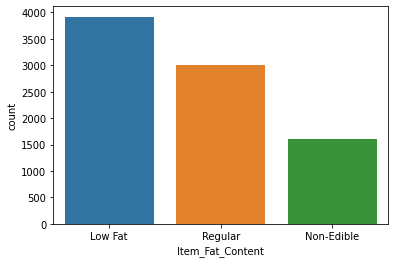

In [ ]:
sns.countplot(df["Item_Fat_Content"])


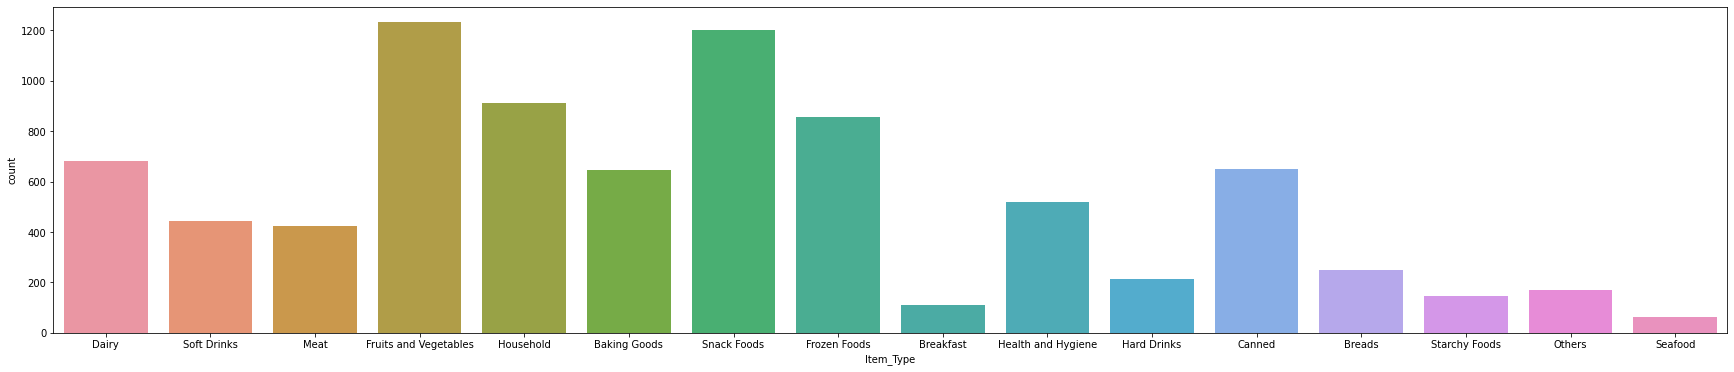

In [ ]:
#  Item_Type count
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

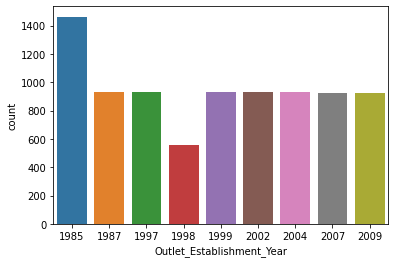

In [ ]:
sns.countplot(df['Outlet_Establishment_Year'])


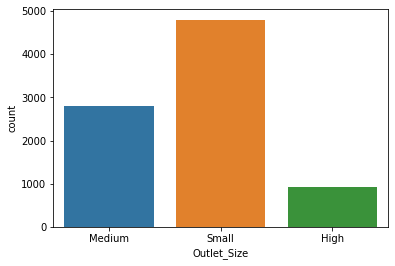

In [ ]:
sns.countplot(df['Outlet_Size'])


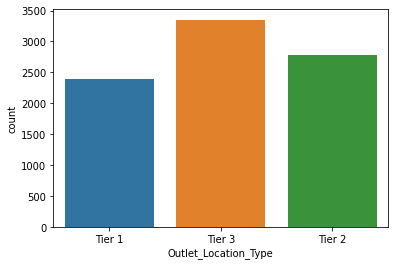

In [ ]:
sns.countplot(df['Outlet_Location_Type'])


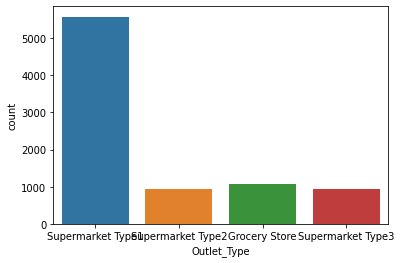

In [ ]:
sns.countplot(df['Outlet_Type'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])


In [ ]:
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet
0,156,9.300,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,9
1,8,5.920,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,3
2,662,17.500,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,9
3,1121,19.200,2,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,1,0
4,1297,8.930,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834,1,1
8519,897,8.380,2,0.046982,0,108.1570,OUT045,2002,2,1,1,549.2850,1,7
8520,1357,10.600,1,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136,2,6
8521,681,7.210,2,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976,1,3


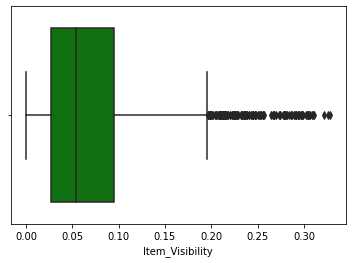

In [ ]:
import seaborn as sns
sns.boxplot(df['Item_Visibility'],color='green')



In [ ]:
df['Item_Visibility'].mean()

0.06613202877895108

In [ ]:
df=df[df['Item_Visibility']<0.19]

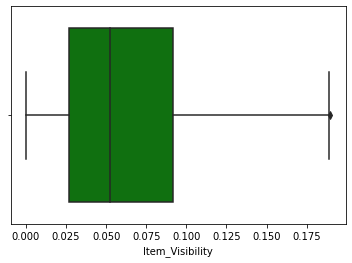

In [ ]:
sns.boxplot(df['Item_Visibility'],data=df,color='g')

In [ ]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

Y = df['Item_Outlet_Sales']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)
print(model)

[12:23:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()


In [ ]:
y_pred=model.predict(X_test)
print(y_pred)

[2180.0767 3305.551  3095.25   ... 2133.203  1379.3893 2641.141 ]


In [ ]:
model_diff=pd.DataFrame({"Actual value":Y_test,"predicted value":y_pred})
model_diff.head()

,Actual value,predicted value
4040,2150.5340,2180.076660
753,7833.8028,3305.551025
5939,4040.7402,3095.250000
7510,3056.0220,2766.926025
3397,1001.3632,3999.308838


In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE=',mean_absolute_error(Y_test,y_pred))

MAE= 764.8997419448899


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(Y_test,y_pred))

MSE= 1212478.8449290793


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred)
print(r2)

0.5857964222477752


In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
y_pred1=linreg.predict(X_test)
print(y_pred1)

[1638.43321199 3417.05836795 3058.29079431 ... 1607.57103333 1156.09694642
 3006.17329967]


In [ ]:
model_diff1=pd.DataFrame({"Actual value":Y_test,"predicted value":y_pred1})
model_diff1.head()

,Actual value,predicted value
4040,2150.5340,1638.433212
753,7833.8028,3417.058368
5939,4040.7402,3058.290794
7510,3056.0220,3376.933350
3397,1001.3632,4039.141423


In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE=',mean_absolute_error(Y_test,y_pred1))
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(Y_test,y_pred1))

MAE= 900.9140877536612
MSE= 1467062.7416524335


In [ ]:
model_diff2=pd.DataFrame({"Actual value":Y_test,"predicted value":y_pred1})
model_diff2.head()

,Actual value,predicted value
4040,2150.5340,1638.433212
753,7833.8028,3417.058368
5939,4040.7402,3058.290794
7510,3056.0220,3376.933350
3397,1001.3632,4039.141423


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred1)
print(r2)

0.4988261948479855


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 4) 
regressor.fit(X_train,Y_train)
y_pred2 = regressor.predict(X_test)
y_pred2

array([1836.2764, 2223.772 , 4364.319 , ..., 2365.5874, 1701.7848,
       2833.6448])

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE=',mean_absolute_error(Y_test,y_pred2))
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(Y_test,y_pred2))

MAE= 1124.707724088464
MSE= 2610704.6312272027


In [ ]:
model_diff3=pd.DataFrame({"Actual value":Y_test,"predicted value":y_pred2})
model_diff3.head()

,Actual value,predicted value
4040,2150.5340,1836.2764
753,7833.8028,2223.7720
5939,4040.7402,4364.3190
7510,3056.0220,4853.6820
3397,1001.3632,5512.8240


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred2)
print(r2)

0.10813850218404286


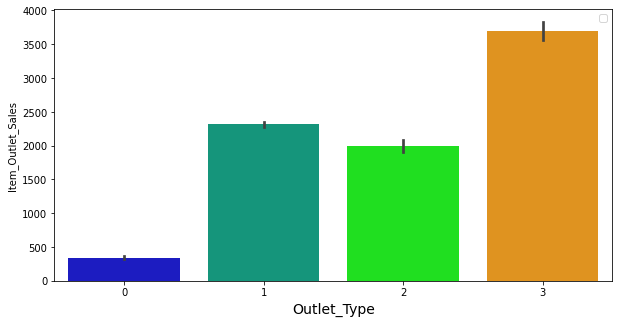

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=df ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()


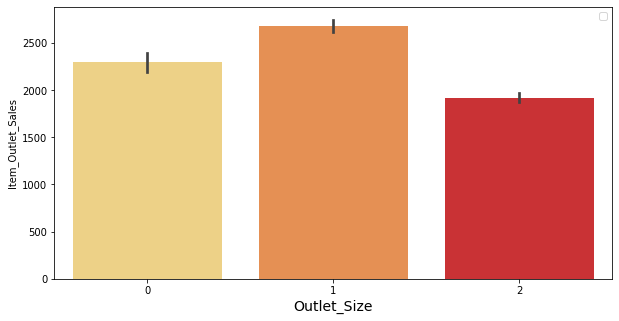

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=df ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()


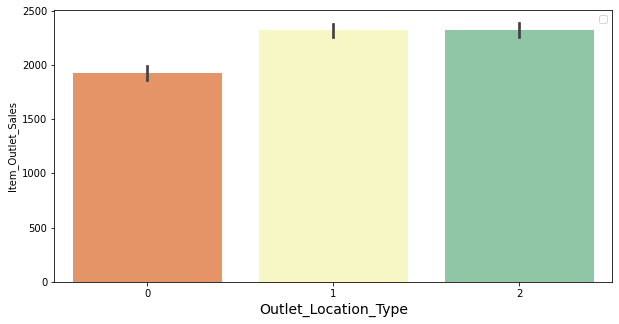

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=df ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()


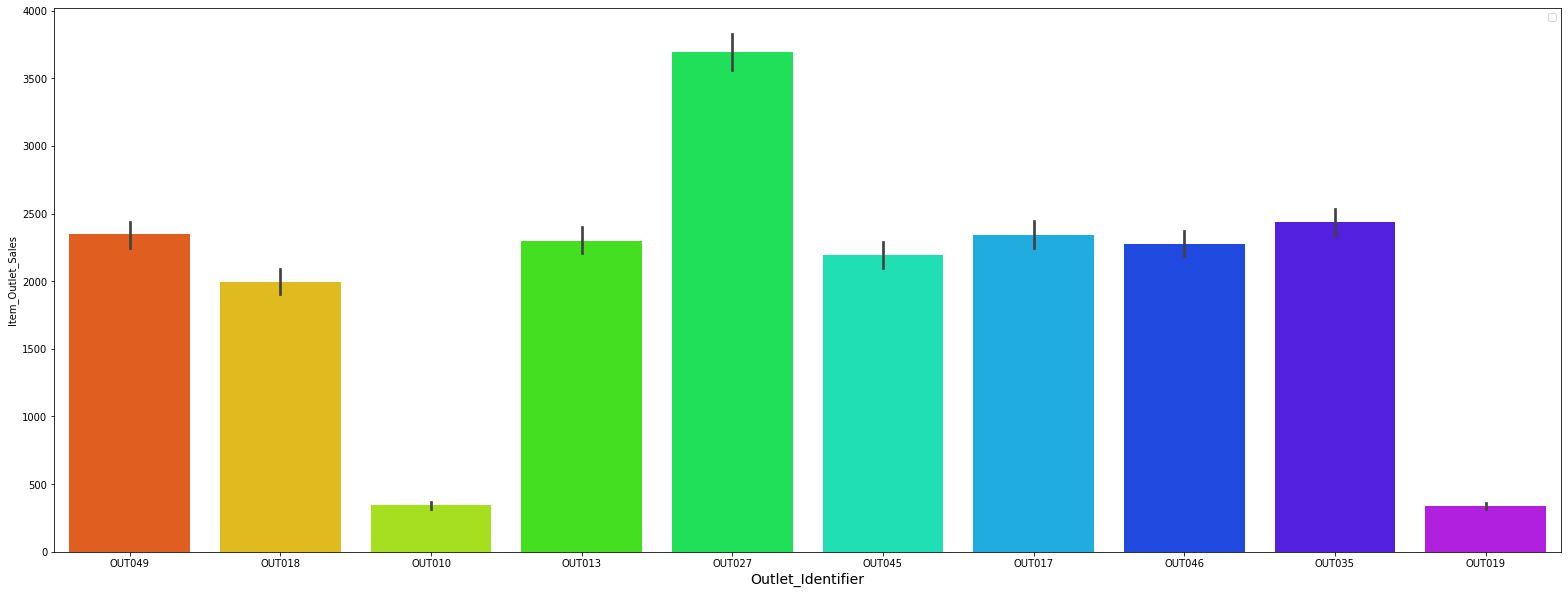

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=df ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()


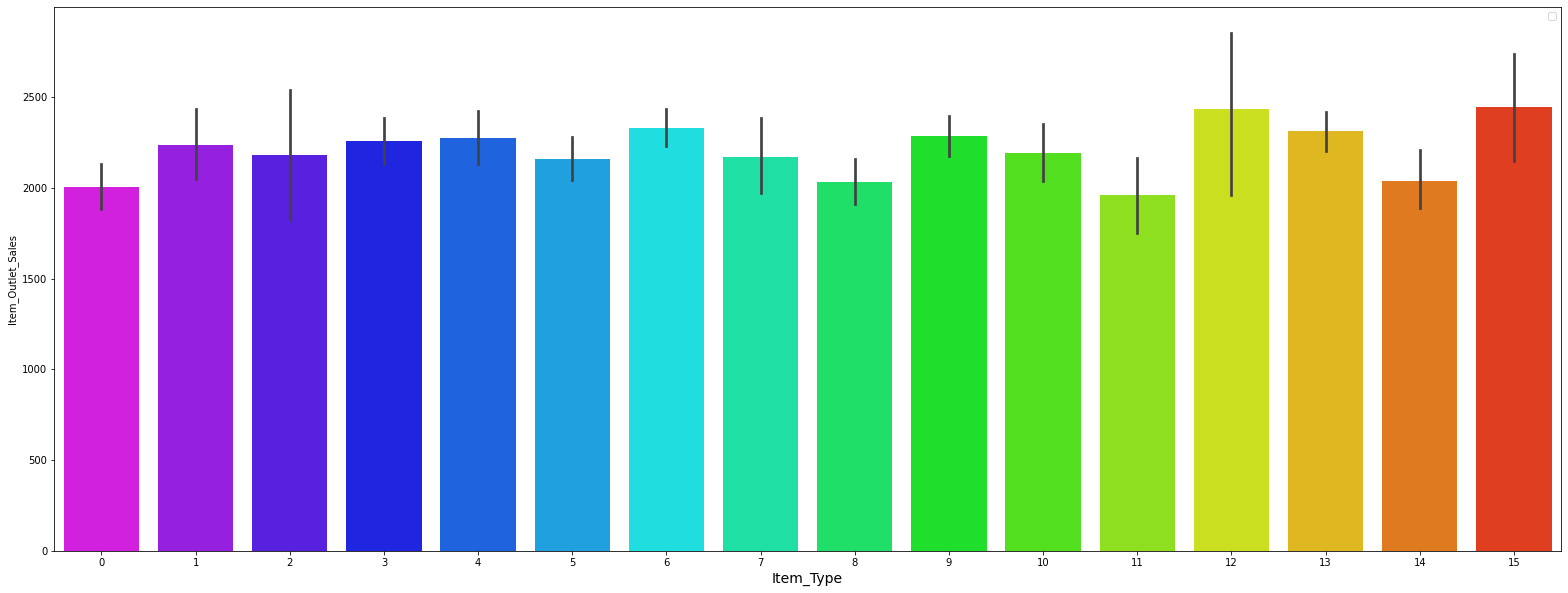

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=df ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()


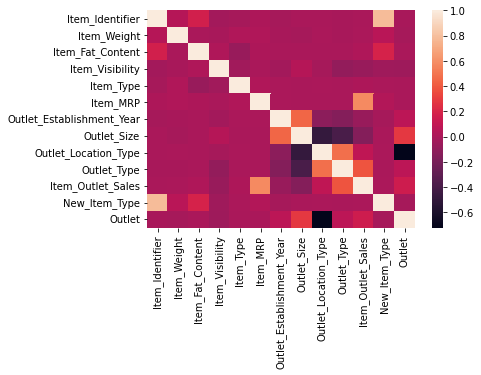

In [ ]:
sns.heatmap(df.corr() ,cmap='rocket')
